# Import Libaries

In [0]:
import cmath 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Import Data

**1. Plot the training data**

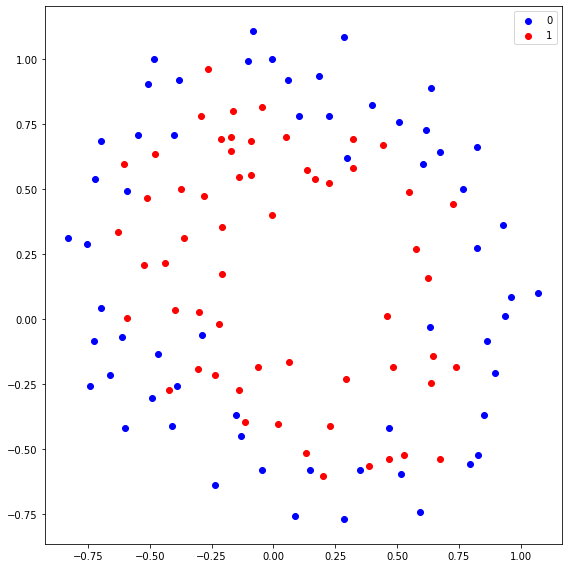

In [86]:
data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')


pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

plt.figure(figsize=(8, 8))
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')

plt.legend(['0','1'])
plt.tight_layout()
plt.show()


*Create New polynomial features*

In [0]:
def map_feature(x1, x2, degree = 6):
    
    map_feature_size = x1.size
    map_feature = np.ones(shape=(map_feature_size, 1))
    
    for i in range(1, degree + 1):
        for j in range(i + 1):
            column = (x1 ** (i - j)) * (x2 ** j)
            map_feature = np.append(map_feature, column, axis=1)   
    return map_feature

In [77]:
x = data[:, :2]

x1 = x[:, [0]]
x2 = x[:, [1]]

map = map_feature(x1, x2)
print(map.shape)

(118, 28)


# Cost Function & Gradient Descent

*Cost Function* 

In [0]:
def sigmoid(z):
     return 1 / (1 + np.exp(-z))

In [0]:
def cost_function(theta, x, y, lambdaa ):  
    
    m = len(x)
    z = 0.001
    
    #hypothesis to avoid zeros
    param = (x.dot(theta))
    hypo = sigmoid(param)
    hypo[hypo == 0] = z
    
    #Intervals to avoid zeros
    interval = 1 - hypo
    interval[interval == 0] = z
    
    y1 = y * np.log(hypo)
    y0 = (1 - y) * np.log(interval)
    y2 = theta**2
    
    cost = ((-1./m) * np.sum(y1 + y0)) + ((lambdaa/(2*m)) * np.sum(y2))
    
    return cost

In [88]:
theta = np.zeros(map.shape[1])
y = data[:, 2]

cost = cost_function(theta, map, y, lambdaa = 12)
print('Cost Function :')
print(cost)

Cost Function :
0.6931471805599454


*Gradient Descent*

In [0]:
def gradient_descent(x, y, theta, lambdaa, tolerance, log=False):
    m = y.size
    episilon = 0.001
    zero     = 0.001
    residual = np.ones(tolerance)
    J        = np.zeros(tolerance)
    interact = 0
    converge = False
    
    while not converge:
        
        ' Start adjusting theta values '
        hypo = sigmoid(x.dot(theta))
        error = hypo - y
        
        error[error == 0] = zero
        
        gradient = ((1./m) * (x.T.dot(error))) + ((lambdaa/(2*m)) * theta)
        
        tmpTheta = theta
        theta = theta - gradient
        
        ' Run the cost function over the data with new theta '
        J[interact] = cost_function(theta, x, y, lambdaa)
        
        step = abs(np.linalg.norm(theta) - np.linalg.norm(tmpTheta))        
        converge = (step <= episilon)
        
        residual[interact] = step
        
        if interact % 100 == 0 and log:
            ' The main idea here is to minimize the error value when evaluating the hypothesis '
            print('Interaction ' + str(interact) + ', Redidual error output :' + str(J[interact]) + ', Step size: ' + str(step))
        
        if (interact + 1) == tolerance:
            print('Caution! The routine has reached the maximum tolerance! Results may not converge.')
            converge = True
            
        interact = interact + 1
    
    '''
        For j = 0 whe do not sum the last term
    '''
    gradient[0] = gradient[0] - ((lambdaa/(2*m)) * theta)[0]
        
    return theta, J, interact, residual, gradient

In [91]:
op_theta, cost, it, r, grad = gradient_descent(map, y, theta,1,2000)
print('Cost :')
print(cost[0])

print('Gradient : ')
print(grad)

Cost :
0.6812915551427071
Gradient : 
[-6.80367953e-03 -1.96528977e-04 -2.48875444e-04  3.21806138e-04
  5.07803053e-04  6.57189806e-04 -1.31618196e-04  1.63439366e-04
  3.82647323e-05 -1.51688166e-05  2.76581442e-04 -1.72124687e-04
  2.44920714e-04  1.72987150e-04  2.54828482e-04  4.23766855e-05
  2.85114723e-05 -1.32247162e-04  1.59581261e-04  1.59592844e-04
 -2.15708745e-04  2.21685251e-04 -1.44559716e-04  9.33056274e-05
 -1.02307656e-04  1.49237085e-04  1.32777034e-04 -1.00723874e-04]
